In [13]:
import pandas as pd
import numpy as np
import re
from pandas_profiling import ProfileReport
from sklearn.feature_extraction import text
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import neattext as nt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option("display.max_rows", 10)
stop = text.ENGLISH_STOP_WORDS
df = pd.read_csv('./test.csv')
df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [14]:
text = df["text"].str.upper()

for i in range(len(text)):
    text[i] = nt.TextFrame(str(text[i])).remove_emails()
    text[i] = nt.TextFrame(str(text[i])).remove_numbers()
    text[i] = nt.TextFrame(str(text[i])).remove_phone_numbers()
    text[i] = nt.TextFrame(str(text[i])).remove_stopwords(lang = "en")
    text[i] = nt.TextFrame(str(text[i])).remove_btc_address()
    text[i] = nt.TextFrame(str(text[i])).remove_urls()
    text[i] = nt.TextFrame(str(text[i])).remove_stopwords(lang = "es")
    text[i] = nt.TextFrame(str(text[i])).remove_emojis()
    text[i] = nt.TextFrame(str(text[i])).remove_html_tags()
    text[i] = nt.TextFrame(str(text[i])).remove_puncts()
    text[i] = nt.TextFrame(str(text[i])).remove_special_characters()


df["text"] = text.astype(str)
df["text"]

0                             HAPPENED TERRIBLE CAR CRASH
1       HEARD EARTHQUAKE DIFFERENT CITIES STAY SAFE EV...
2         FOREST FIRE SPOT POND GEESE FLEEING STREET SAVE
3                   APOCALYPSE LIGHTING SPOKANE WILDFIRES
4                     TYPHOON SOUDELOR KILLS CHINA TAIWAN
                              ...                        
3258     EARTHQUAKE SAFETY ANGELES  SAFETY FASTENERS XRWN
3259    STORM RI WORSE HURRICANE CITYAMPOTHERS HARDEST...
3260                        GREEN LINE DERAILMENT CHICAGO
3261             MEG ISSUES HAZARDOUS WEATHER OUTLOOK HWO
3262    CITYOFCALGARY ACTIVATED MUNICIPAL EMERGENCY PL...
Name: text, Length: 3263, dtype: object

In [15]:
# df = df.dropna()
lista = df["keyword"].unique()
for category in lista:
    df_temp = df["text"].loc[df['keyword'] == category]

    frequency_table = df_temp.str.split(expand=True).stack().value_counts()
    print("CATEGORIA =", category, " || PALABRA = ",  frequency_table[0:1].to_string())

CATEGORIA = nan  || PALABRA =  Series([], )
CATEGORIA = ablaze  || PALABRA =  ABLAZE    14
CATEGORIA = accident  || PALABRA =  ACCIDENT    14
CATEGORIA = aftershock  || PALABRA =  AFTERSHOCK    13
CATEGORIA = airplane%20accident  || PALABRA =  ACCIDENT    15
CATEGORIA = ambulance  || PALABRA =  AMBULANCE    11
CATEGORIA = annihilated  || PALABRA =  ANNIHILATED    14
CATEGORIA = annihilation  || PALABRA =  NATIONAL    22
CATEGORIA = apocalypse  || PALABRA =  APOCALYPSE    17
CATEGORIA = armageddon  || PALABRA =  ARMAGEDDON    8
CATEGORIA = army  || PALABRA =  ARMY    14
CATEGORIA = arson  || PALABRA =  ARSON    16
CATEGORIA = arsonist  || PALABRA =  ARSONIST    10
CATEGORIA = attack  || PALABRA =  ATTACK    14
CATEGORIA = attacked  || PALABRA =  ATTACKED    14
CATEGORIA = avalanche  || PALABRA =  AVALANCHE    16
CATEGORIA = battle  || PALABRA =  BATTLE    6
CATEGORIA = bioterror  || PALABRA =  FEDEX    13
CATEGORIA = bioterrorism  || PALABRA =  BIOTERRORISM    17
CATEGORIA = blaze  || P

In [16]:
# pd.set_option("display.max_rows", None)
frequency_table = df["text"].str.split(expand=True).stack().apply(lambda x: x if len(x) > 1 and x != 'http' and x != 'https' and x != '//t' else None ).value_counts()
frequency_table

LIKE             145
AMP              136
IM               125
FIRE             107
NEW              102
                ... 
HAYES              1
HUNTER             1
DANNYBMILLER       1
AARON              1
CITYAMPOTHERS      1
Length: 9894, dtype: int64

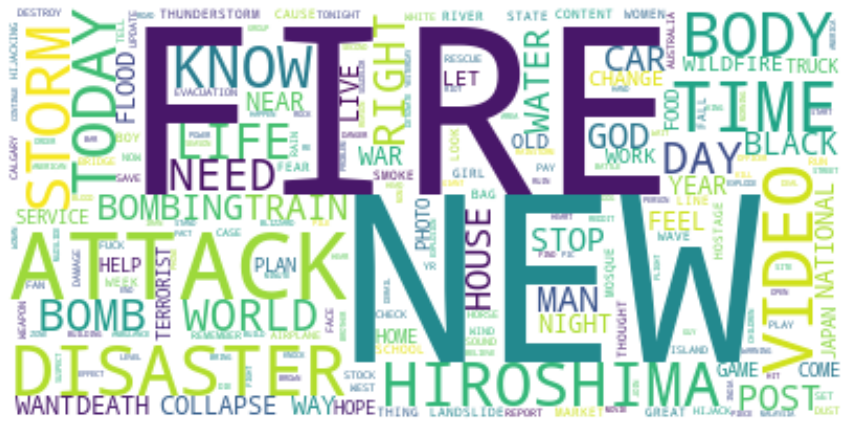

In [17]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(frequency_table.to_string())
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

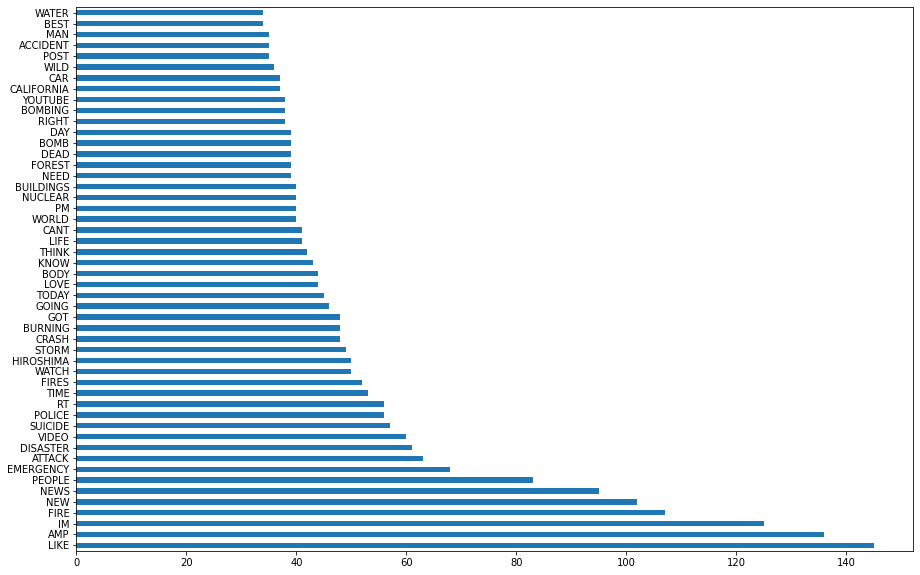

In [18]:
# Me quede en el histograma ademas hay que remover bien esa mierda de los links y esas letras como b o las u's
frequency_table = frequency_table[0:50]
plt.figure( figsize=(15,10))
frequency_table.plot(kind='barh')

In [19]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

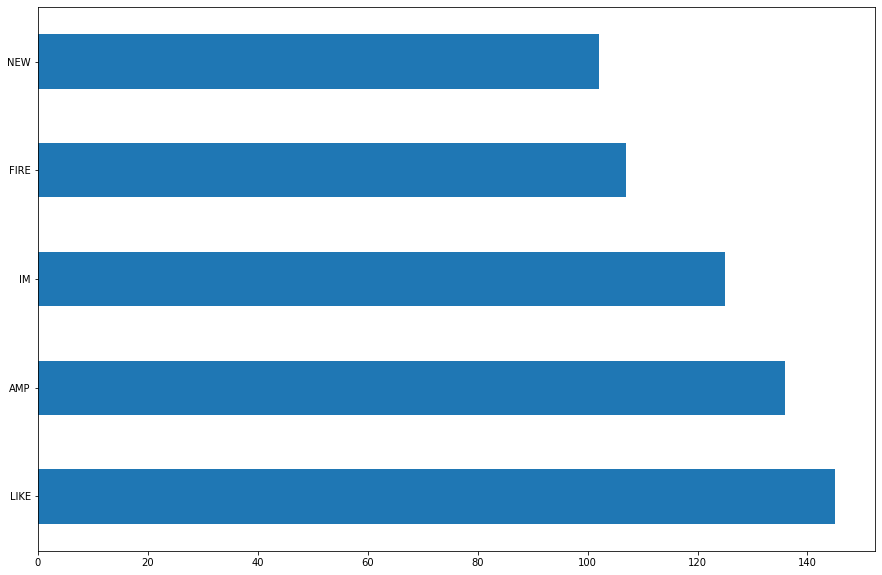

In [20]:
frequency_table = df["text"].str.split(expand=True).stack().apply(lambda x: x if len(x) > 1 and x != 'http' and x != 'https' and x != '//t' else None ).value_counts()

frequency_table = frequency_table[0:5]
plt.figure( figsize=(15,10))
frequency_table.plot(kind='barh')

In [21]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

score = []
scorePolarity = []

for tweet in df['text']:
    scoreObject = sid.polarity_scores(tweet)
    scoreText = scoreObject['compound']

    if scoreText < -0.33:
        scorePolarity.append('negative')
    elif scoreText > 0.33:
        scorePolarity.append('positive')
    else:
        scorePolarity.append('neutral')

    score.append(scoreText)

df['score'] = score
df['polaridad'] = scorePolarity

df.sort_values(by=["score"], ascending=False).head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,keyword,location,text,score,polaridad
438,1417,body%20bag,NaN,LOVE WIN SUZES AMAZING FILLED BEAUTY BAG GIVEA...,0.9485,positive
706,2295,cliff%20fall,NaN,MEGA KEEN HIKING TOMORROW HOPE FALL CLIFF HAHA...,0.9371,positive
2512,8376,ruin,NaN,SAID HES GONNA RING HARVEYS BURGER LOVE PERFEC...,0.9330,positive
2696,8988,storm,Oman,MAN UNITED PLAYING FOOTBALL LIKE SPAIN PASSION...,0.9062,positive
1808,6117,hellfire,"Denver, Colorado",CONSIDER GOOD GIVING ADVICE LIKE THINK GOOD A...,0.9042,positive
342,1108,blew%20up,NaN,WOW BRO BLEW QUICK BELIEVE HES FUNNY CLEVER PE...,0.9042,positive
86,295,ambulance,"Chorley, Lancashire, UK",PRIVILEGED PROUD WEAR UNIFORM NHS AMBULANCE GA...,0.9001,positive
1813,6131,hellfire,NaN,PROPHET PEACE HIM SAID SAVE HELLFIRE GIVING HA...,0.8979,positive
1026,3366,demolition,"Carthage, OH",WOW CARTHAGE AUTO PARTS CELEBRITY DEMOLITION D...,0.8957,positive
847,2781,curfew,isabel beatriz paras de leon,BENZNIBEADEL HEHE LIKE U HAHAHA IM KIDDING LOV...,0.8934,positive


In [22]:
# NEGATIVOS

df.sort_values(by=["score"]).head(10)

,id,keyword,location,text,score,polaridad
1286,4228,drowned,NaN,JEFF BULLIED SALLY RAPED BEN DROWNED HOODIE BE...,-0.9716,negative
2750,9155,suicide%20bomber,NaN,SUICIDE BOMBER KILLS SAUDI MOSQUE SUICIDE BOMB...,-0.9545,negative
635,2072,casualty,NaN,THE CASUALTY WAR TRUTH HIRAM JOHNSON DIED DA...,-0.9524,negative
1146,3783,destruction,NaN,DAY DEATH DESTRUCTION CHAOS PEOPLE KILLED INST...,-0.9501,negative
2774,9214,suicide%20bombing,NaN,REMEMBERING SGTMAJ RONI GHANEM MAGHAR MURDERED...,-0.9451,negative
1910,6439,injured,South Africa Braamfontein,DEAD DOZENS INJURED GAZA BLAST NEAR HOUSE LEVE...,-0.9451,negative
1908,6435,injured,bangalore,UDHAMPUR TERROR ATTACK MILITANTS ATTACK POLICE...,-0.9451,negative
1557,5240,fatality,"Santa Cruz, CA",LET WRITING SUFFER FATALITY LEARN SEEK DESTROY...,-0.9432,negative
2747,9150,suicide%20bomber,NaN,SUICIDE BOMBER KILLS SAUDI MOSQUE SUICIDE BOMB...,-0.9382,negative
2033,6838,loud%20bang,NaN,SCHOOL BOUTA START IGNORANT ASS KIDS LOUD UGLY...,-0.9371,negative


In [23]:
# POSITIVOS


df.sort_values(by=["score"], ascending=False).head(10)

,id,keyword,location,text,score,polaridad
438,1417,body%20bag,NaN,LOVE WIN SUZES AMAZING FILLED BEAUTY BAG GIVEA...,0.9485,positive
706,2295,cliff%20fall,NaN,MEGA KEEN HIKING TOMORROW HOPE FALL CLIFF HAHA...,0.9371,positive
2512,8376,ruin,NaN,SAID HES GONNA RING HARVEYS BURGER LOVE PERFEC...,0.9330,positive
2696,8988,storm,Oman,MAN UNITED PLAYING FOOTBALL LIKE SPAIN PASSION...,0.9062,positive
1808,6117,hellfire,"Denver, Colorado",CONSIDER GOOD GIVING ADVICE LIKE THINK GOOD A...,0.9042,positive
342,1108,blew%20up,NaN,WOW BRO BLEW QUICK BELIEVE HES FUNNY CLEVER PE...,0.9042,positive
86,295,ambulance,"Chorley, Lancashire, UK",PRIVILEGED PROUD WEAR UNIFORM NHS AMBULANCE GA...,0.9001,positive
1813,6131,hellfire,NaN,PROPHET PEACE HIM SAID SAVE HELLFIRE GIVING HA...,0.8979,positive
1026,3366,demolition,"Carthage, OH",WOW CARTHAGE AUTO PARTS CELEBRITY DEMOLITION D...,0.8957,positive
847,2781,curfew,isabel beatriz paras de leon,BENZNIBEADEL HEHE LIKE U HAHAHA IM KIDDING LOV...,0.8934,positive
